<a href="https://colab.research.google.com/github/Anschoudary/DeepLearning/blob/main/Hand_Written_Digits_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hand Written Digits Prediction**

The following notebook shows how a simple neural network trains on an images dataset and how can we use it in real life.

In [1]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

## **Dataset**

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Shape: ")
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

print("Length: ")
print(len(train_images))
print(len(test_images))

print("Dimension: ")
print(train_images.ndim)
print(train_labels.ndim)
print(test_images.ndim)
print(test_labels.ndim)

Shape: 
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
Length: 
60000
10000
Dimension: 
3
1
3
1


5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

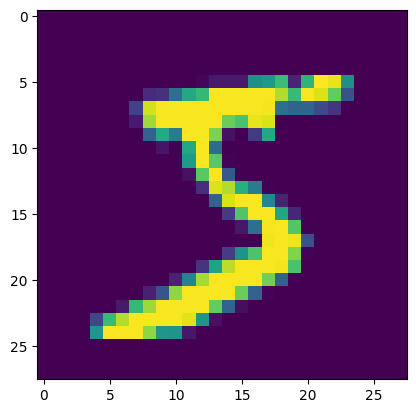

In [5]:
print(train_labels[0])
print(train_images[0])
plt.imshow(train_images[0])

## **Pre-prprocessing dataset**

In [8]:
train_images = train_images/255
train_images = train_images.reshape(60000, 28, 28)

test_images = test_images/255
test_images = test_images.reshape(10000, 28, 28)

print(train_images.shape)
print(test_images.shape)

print(train_images.ndim)
print(test_images.ndim)

(60000, 28, 28)
(10000, 28, 28)
3
3


## **Building a simple neural network**

In [11]:
def build_model():
  model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28, 28)),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dense(10, activation='softmax')],
      name = 'mnist_model')
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  return model

In [12]:
model = build_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "mnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

## **Training our dataset on neural network**

In [22]:
history = model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3548 - loss: 1.6463
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3539 - loss: 1.6408
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3552 - loss: 1.6324
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.3593 - loss: 1.6363
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.3602 - loss: 1.6277
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.3597 - loss: 1.6307
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.3615 - loss: 1.6249
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3647 - loss: 1.6136
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.3643 - loss: 1.6163
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3685 - loss: 1.6139
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.3675 - loss: 1.6114
Epoch 12/50
1875/1875 ━━

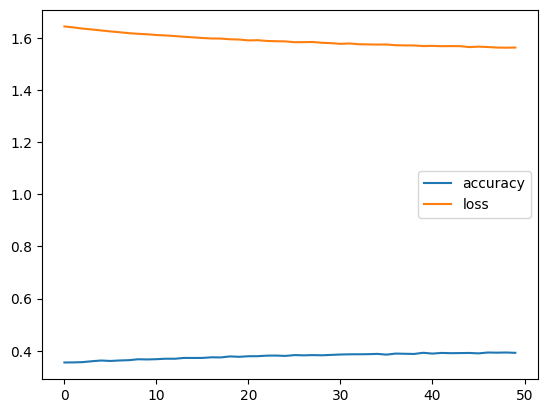

In [23]:
accuracy = history.history['accuracy']
loss = history.history['loss']

plt.plot(accuracy)
plt.plot(loss)
plt.legend(['accuracy', 'loss'])
plt.show()

In [24]:
from sklearn.metrics import accuracy_score

# Calculate predictions
y_pred = model.predict(test_images)

# Convert predictions to class labels
y_pred = np.argmax(y_pred, axis=1)

accuracy_score = accuracy_score(test_labels, y_pred)

print(accuracy_score)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.3904


## **Confusion Metrix**

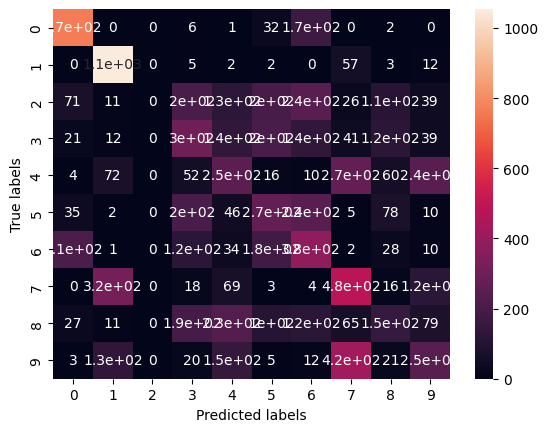

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_pred)

# Plot confusion matrix
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### Using our trained model to predict an image.

In [44]:
import cv2

def predict_image(image_path):
  image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) # Read the image file
  plt.imshow(image)
  image = cv2.resize(image, (28, 28)) # Resize the image to 28x28 pixels
  image = image/255.0 # Use 255.0 to ensure floating-point division
  image = image.reshape(1, 28, 28)
  prediction = model.predict(image)
  predicted_label = np.argmax(prediction)
  print(predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1


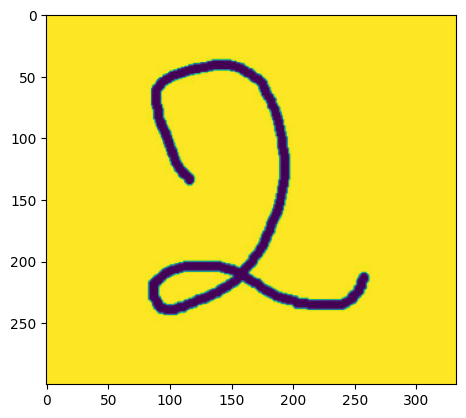

In [45]:
image = '/content/image.jpeg'
predict_image(image)

In the above you can see that the model has very low  accuracy. It's your task to use more layers, epochs or use CNN to enhance the efficiency of model.